In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [2]:
df_sra = pd.read_csv('../data_tables/sra_technology_species.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_sra

,LibraryStrategy,SRAStudy,ScientificName
0,WGS,ERP000767,Leishmania infantum
1,WGS,ERP000767,Leishmania infantum
2,WGS,ERP000767,Leishmania donovani
3,WGS,ERP000767,Leishmania donovani
4,WGS,ERP000767,Leishmania donovani
...,...,...,...
7676058,FL-cDNA,SRP002493,Vaccinia virus
7676059,FL-cDNA,SRP002493,Vaccinia virus
7676060,FL-cDNA,SRP002493,Vaccinia virus
7676061,OTHER,SRP002064,environmental samples


In [3]:
df_sra.columns = ['Technology','SRAStudy','Species']
df_sra

,Technology,SRAStudy,Species
0,WGS,ERP000767,Leishmania infantum
1,WGS,ERP000767,Leishmania infantum
2,WGS,ERP000767,Leishmania donovani
3,WGS,ERP000767,Leishmania donovani
4,WGS,ERP000767,Leishmania donovani
...,...,...,...
7676058,FL-cDNA,SRP002493,Vaccinia virus
7676059,FL-cDNA,SRP002493,Vaccinia virus
7676060,FL-cDNA,SRP002493,Vaccinia virus
7676061,OTHER,SRP002064,environmental samples


In [4]:
df_sra = df_sra.drop_duplicates(subset=['SRAStudy'],keep='first')
df_sra

,Technology,SRAStudy,Species
0,WGS,ERP000767,Leishmania infantum
26,WGS,ERP021269,Salarias fasciatus
41,Targeted-Capture,ERP110990,Leishmania donovani
197,WGS,ERP108795,Homo sapiens
299,POOLCLONE,ERP108142,Homo sapiens
...,...,...,...
7676036,AMPLICON,SRP002405,viral metagenome
7676043,FL-cDNA,SRP002407,Drosophila simulans
7676046,OTHER,SRP001735,Human herpesvirus 4 strain B95-8
7676055,AMPLICON,SRP001705,Human immunodeficiency virus 1


In [5]:
df_sra_count = pd.read_csv('../data_tables/SRAStudy_count.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_sra_count 

,Unnamed: 0,SRAStudy,Count
0,0,0,4
1,1,0.0,7
2,2,100,2
3,3,454,12
4,4,AB,2
...,...,...,...
20054,20054,SRP200173,6
20055,20055,SRP201254,1
20056,20056,SRP201956,1
20057,20057,SRP212328,1


In [6]:
df_sra_count = df_sra_count.drop(df_sra_count.columns[[0]], axis=1)
df_sra_count

,SRAStudy,Count
0,0,4
1,0.0,7
2,100,2
3,454,12
4,AB,2
...,...,...
20054,SRP200173,6
20055,SRP201254,1
20056,SRP201956,1
20057,SRP212328,1


In [7]:
df_combined=pd.merge(df_sra, df_sra_count, on="SRAStudy")
df_combined

,Technology,SRAStudy,Species,Count
0,WGS,ERP000767,Leishmania infantum,3
1,WGS,ERP000195,Anopheles gambiae,2
2,WGS,ERP000190,Plasmodium falciparum,40
3,WGS,SRP046387,Escherichia coli,22
4,WGS,SRP063697,Salmonella enterica,1
...,...,...,...,...
20050,WGS,ERP001880,Foot-and-mouth disease virus - type O,1
20051,RNA-Seq,SRP013296,Flock House virus,1
20052,AMPLICON,ERP001147,Human immunodeficiency virus 1,1
20053,AMPLICON,SRP014319,HIV-1 M:B_89.6,1


In [8]:
df_combined = df_combined.drop(df_combined.columns[[1,2]], axis=1)
df_combined

,Technology,Count
0,WGS,3
1,WGS,2
2,WGS,40
3,WGS,22
4,WGS,1
...,...,...
20050,WGS,1
20051,RNA-Seq,1
20052,AMPLICON,1
20053,AMPLICON,1


In [9]:
df_sra_technology=df_combined.groupby('Technology').agg({'Count':'sum'}).reset_index().rename(columns={'Technology':"Count"})
df_sra_technology

,Count,Count
0,Chloraminated water,7
1,Leaf_2,4
2,cell culture,4
3,clone 1,2
4,in vitro,10
5,replicate III,59
6,AMPLICON,10330
7,ATAC-seq,25
8,Bisulfite-Seq,390
9,CLONE,117


In [10]:
df_sra_technology.columns = ['Technology','Count']
df_sra_technology

,Technology,Count
0,Chloraminated water,7
1,Leaf_2,4
2,cell culture,4
3,clone 1,2
4,in vitro,10
5,replicate III,59
6,AMPLICON,10330
7,ATAC-seq,25
8,Bisulfite-Seq,390
9,CLONE,117


In [11]:
Total = df_sra_technology['Count'].sum()
print (Total)

63297


In [12]:
df_sra_technology['Percentage']=(df_sra_technology['Count']/63297)*100
df_sra_technology

,Technology,Count,Percentage
0,Chloraminated water,7,0.011059
1,Leaf_2,4,0.006319
2,cell culture,4,0.006319
3,clone 1,2,0.003160
4,in vitro,10,0.015799
5,replicate III,59,0.093211
6,AMPLICON,10330,16.319889
7,ATAC-seq,25,0.039496
8,Bisulfite-Seq,390,0.616143
9,CLONE,117,0.184843


In [13]:
df_sra_technology = df_sra_technology[df_sra_technology['Percentage'] > 1]#remove percentage that less than 1
df_sra_technology

,Technology,Count,Percentage
6,AMPLICON,10330,16.319889
12,ChIP-Seq,1394,2.202316
14,EST,798,1.260723
23,OTHER,3435,5.426797
27,RNA-Seq,19031,30.066196
33,WGS,24454,38.633743
35,miRNA-Seq,1019,1.609871


<Figure size 2880x1800 with 0 Axes>

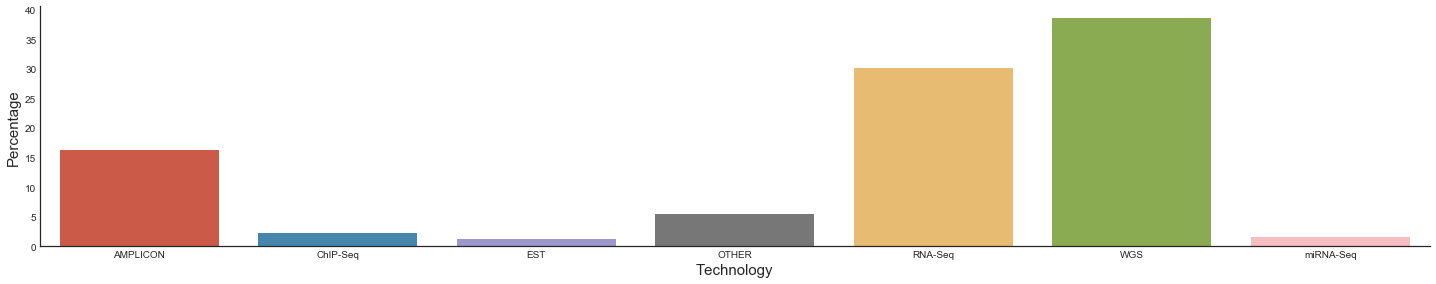

In [14]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='Technology', y='Percentage', data=df_sra_technology,
            height=4,aspect=5,kind='bar')
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_xlabel('Technology', fontsize = 15)
ax.axes[0,0].set_ylabel('Percentage', fontsize = 15)

#save to .png
ax.savefig('reuse_by_technology_SRA.png', dpi = 200, bbox_inches = 'tight', transparent = False)

In [15]:
df_combined=df_combined.loc[df_combined['Technology'].isin(['AMPLICON','ChIP-Seq','EST','OTHER','RNA-Seq','WGS','miRNA-Seq'])]
df_combined

,Technology,Count
0,WGS,3
1,WGS,2
2,WGS,40
3,WGS,22
4,WGS,1
...,...,...
20049,OTHER,3
20050,WGS,1
20051,RNA-Seq,1
20052,AMPLICON,1


<Figure size 2880x1800 with 0 Axes>

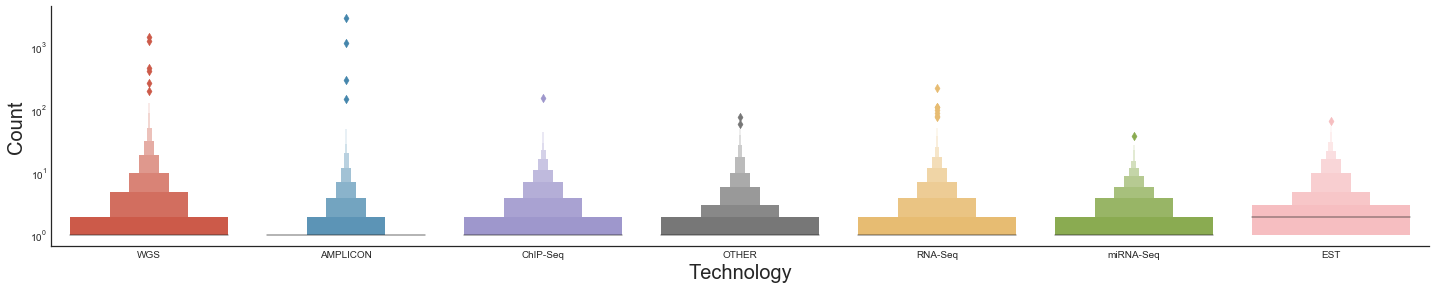

In [17]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='Technology', y='Count', data=df_combined,
            height=4,aspect=5,kind='boxen')
sns.despine()

# set axis labels
ax.axes[0,0].set_xlabel('Technology', fontsize = 20)
ax.axes[0,0].set_ylabel('Count', fontsize = 20)
plt.yscale('log')

#save to .png
ax.savefig('Reuse_by_species_SRA.png', dpi = 200, bbox_inches = 'tight', transparent = False)